<img src="../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

## _*Quantum World*_ 

The latest version of this notebook is available on https://github.com/QISKit/qiskit-tutorial.

***
### Contributors
Jay Gambetta and Ismael Faro

In [1]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import available_backends, execute, register, least_busy
from qiskit.wrapper.jupyter import *
# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer

In [2]:
#import Qconfig and set APIToken and API url
try:
    import sys
    sys.path.append("../") # go to parent dir
    import Qconfig
    qx_config = {
        "APItoken": Qconfig.APItoken,
        "url": Qconfig.config['url']}
except Exception as e:
    print(e)
    qx_config = {
        "APItoken":"YOUR_TOKEN_HERE",
        "url":"https://quantumexperience.ng.bluemix.net/api"}

#set api
register(qx_config['APItoken'], qx_config['url'])

In [3]:
backend = least_busy(available_backends({'simulator': False, 'local': False}))
print("The least busy backend is " + backend)

The least busy backend is ibmqx5


In [4]:
%%qiskit_job_status
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])
qc.measure(q, c)
job_exp = execute(qc, backend=backend, shots=1024, max_credits=3)

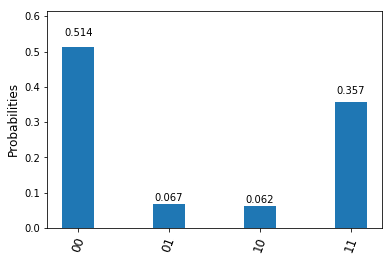

You have made entanglement!


In [7]:
plot_histogram(job_exp.result().get_counts(qc))
print('You have made entanglement!')

The circuit that was run on the machine is

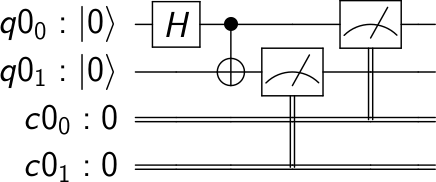

In [8]:
circuit_drawer(qc)